In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(most_recent_date)

('2017-08-23',)


In [10]:
# 1.Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.



last_12_months = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
print(last_12_months)

2016-08-23


In [11]:
#2.Perform a query to retrieve the data and precipitation scores
data = session.query(measurement.date, measurement.prcp).filter(measurement.date >= last_12_months).all()
for results in data:
    print(results)

('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('

In [12]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data
climate_df = pd.DataFrame(data, columns = ['Date','Precipitation'])
climate_df = climate_df.sort_values(['Date']).dropna()

In [13]:
climate_df.head()

,Date,Precipitation
0,2016-08-23,0.00
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
1881,2016-08-23,0.70


In [14]:
climate = climate_df.set_index('Date')
climate.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70


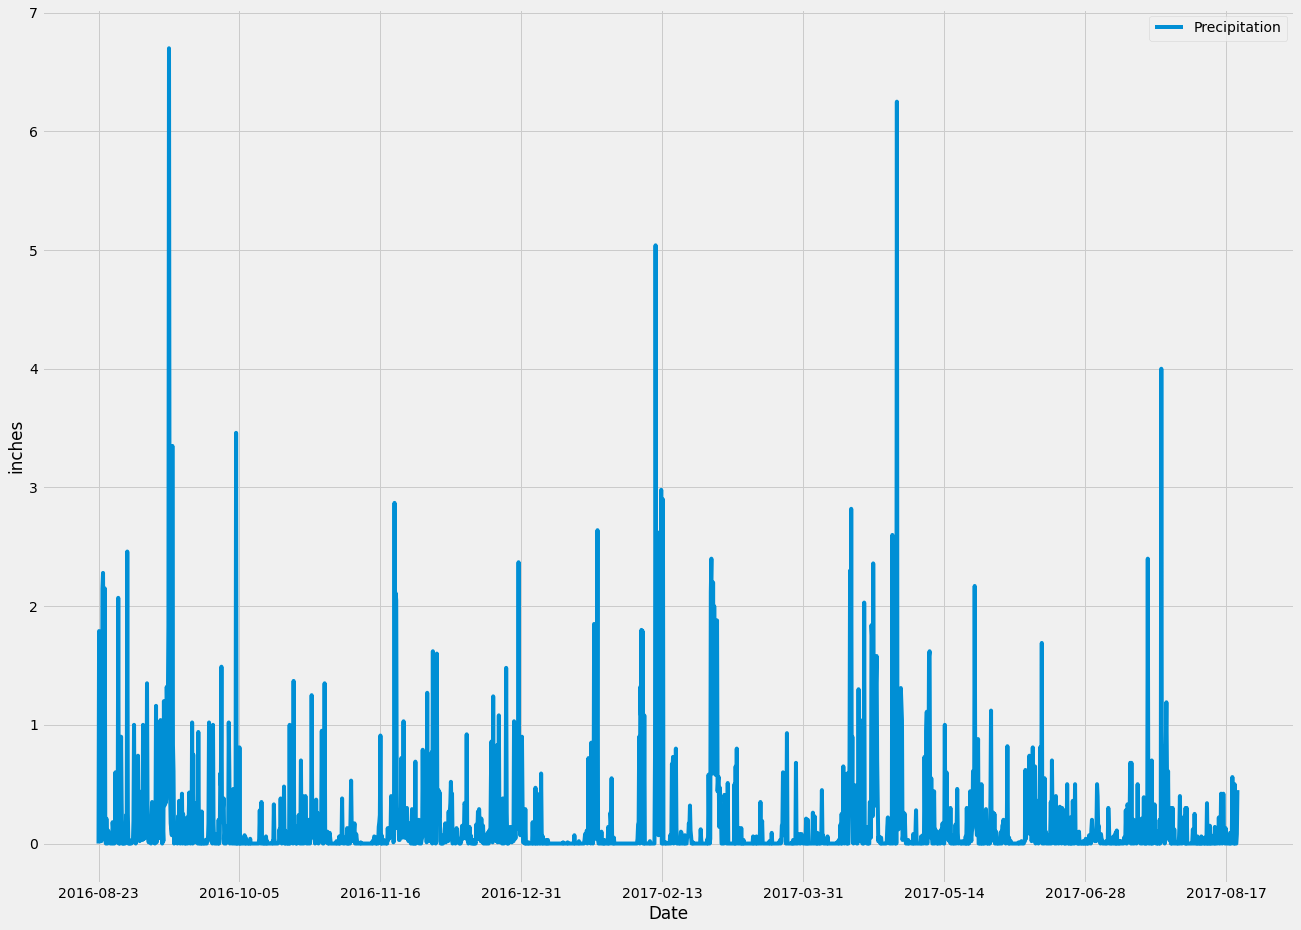

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
climate.plot(figsize = (20,15))
plt.xlabel('Date')
plt.ylabel('inches')
plt.savefig('challenge_images/precipitation_first_chart.png')
plt.show()

In [16]:
#saving image as required for submission


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number stations in the dataset
session.query(station).count()

9

In [18]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

count = func.count(measurement.id)

most_active_stations = (
session.query(measurement.station, count).group_by(measurement.station).\
order_by(count.desc()).all())

from pprint import pprint
pprint(most_active_stations)


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]


In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_temp = (session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs))\
    .filter(measurement.station == most_active_stations[0][0])\
    .all()
)

print(f"Most active station is: {most_active_stations[0][0]}:")
print(f"Lowest Temperature: {station_temp[0][0]}")
print(f"Highest Temperature: {station_temp[0][1]}")
print(f"Average Temperature: {station_temp[0][2]}")


Most active station is: USC00519281:
Lowest Temperature: 54.0
Highest Temperature: 85.0
Average Temperature: 71.66378066378067


In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

results =\
session.query(measurement.date, measurement.tobs).\
filter(measurement.date >= last_12_months).filter(measurement.station == most_active_stations[0][0]).all()


In [21]:
results = pd.DataFrame(results)
results.head()

,0,1
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


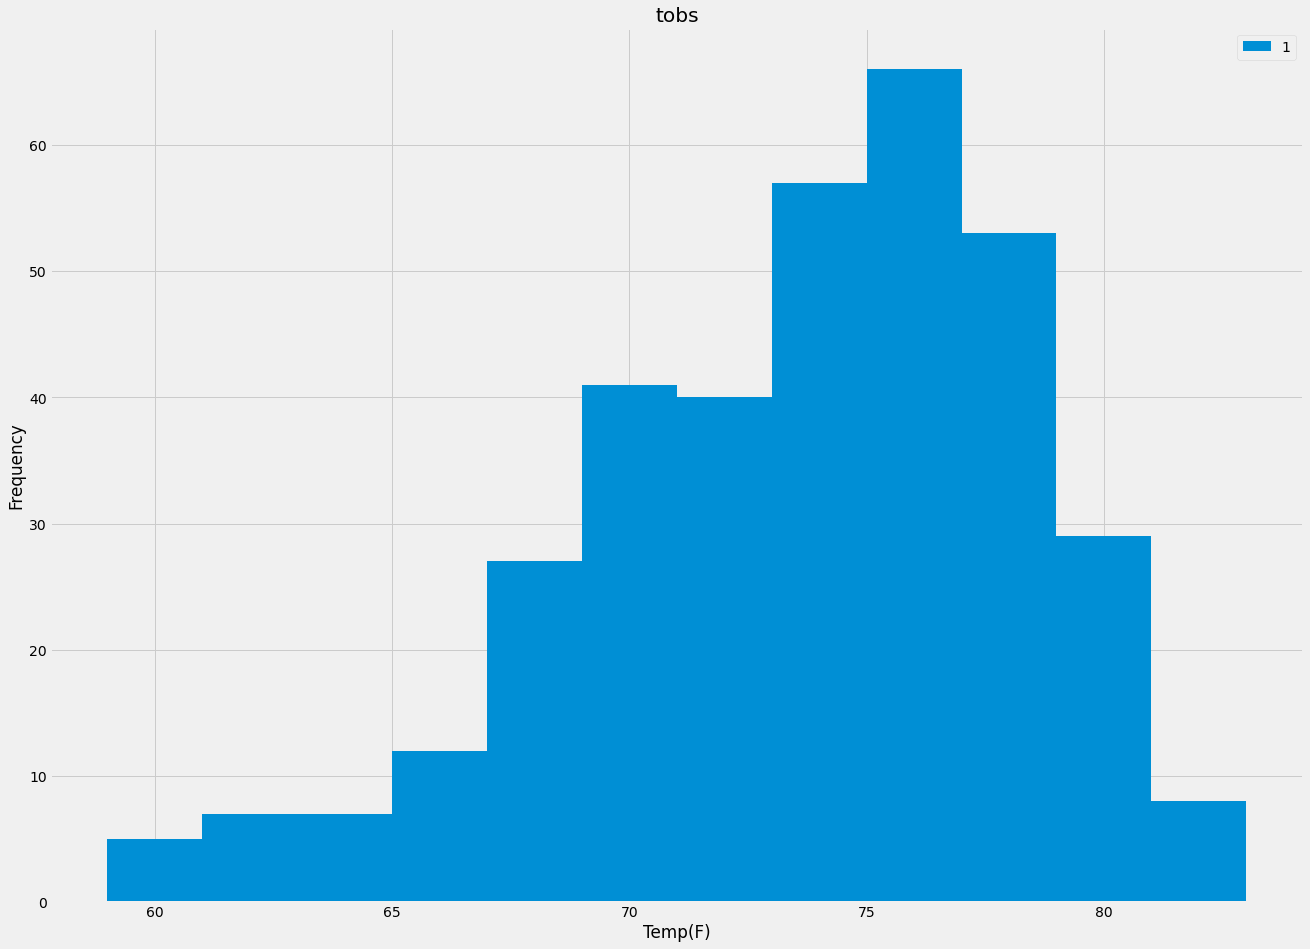

In [22]:
results.plot.hist(figsize = (20,15), bins=12)
plt.xlabel("Temp(F)")
plt.ylabel('Frequency')
plt.title("tobs")
plt.savefig('challenge_images/histogram_second_chart.png')
plt.show()

# Close session

In [23]:
# Close Session
session.close()

In [24]:
#closed